In [86]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, fbeta_score, recall_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# 加载数据
data_dict = pickle.load(open("./data.pickle", 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

In [88]:
# 数据集划分
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels, random_state=42)

In [89]:
# 训练 KNN 分类器
modelknn = KNeighborsClassifier(n_neighbors=5)  # 使用5个邻居（可根据需要调整）
modelknn.fit(x_train, y_train)
y_predict = modelknn.predict(x_test)

In [90]:
# 将模型保存为 .pkl 文件
import pickle
with open('modelknn.p', 'wb') as file:
    pickle.dump(modelknn, file)

In [91]:
# 计算准确率
accuracy = accuracy_score(y_test, y_predict)
print('KNN Accuracy:', accuracy * 100)

KNN Accuracy: 100.0


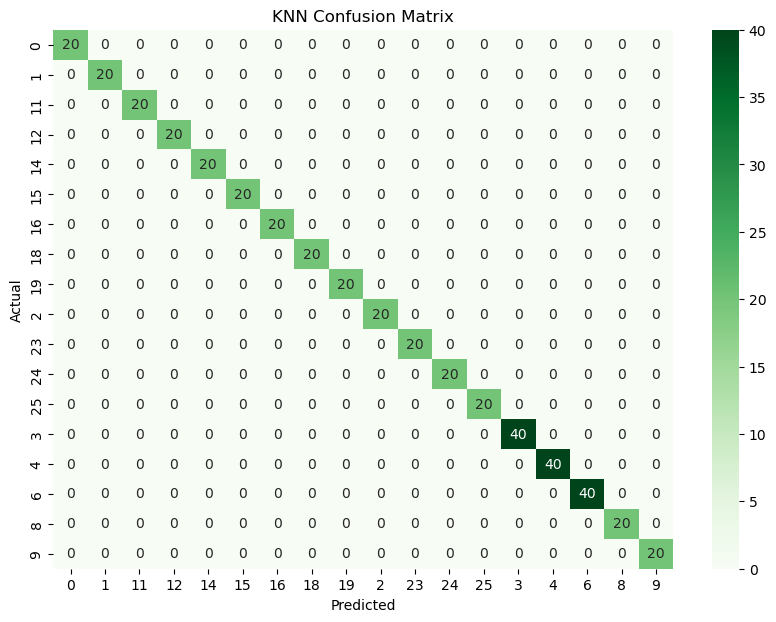

In [92]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [93]:
# 计算 F2分数 和 召回率
f2 = fbeta_score(y_test, y_predict, beta=2, average='macro')
recall = recall_score(y_test, y_predict, average='macro')
print("KNN F2 Score:", f2)
print("KNN Recall:", recall)

KNN F2 Score: 1.0
KNN Recall: 1.0


In [94]:
# 使用 OneVsRestClassifier 包装 KNN 模型
knn_ovr = OneVsRestClassifier(modelknn)
knn_ovr.fit(x_train, y_train)
y_score = knn_ovr.predict_proba(x_test)

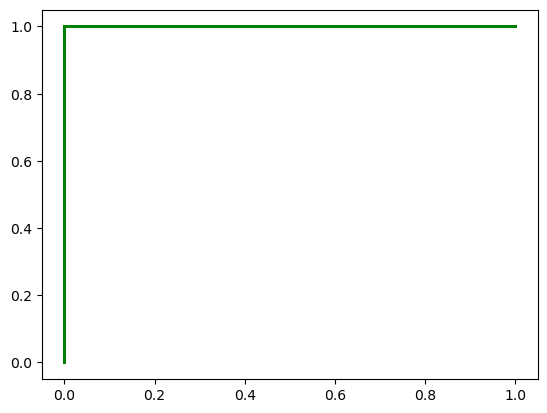

In [95]:
# 绘制 ROC 曲线
y_test_binary = label_binarize(y_test, classes=np.unique(labels))
n_classes = y_test_binary.shape[1]

plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='green',lw=2, label='Class {} (AUC = {:.2f})'.format(i, roc_auc))